# Potential Ways to estimates Mstar #

### z0MGS ###
- around 3500 matches
- logMstar provided in the catalog, so we can use this as a reference

### GSWLC2 ###
- 450 matches
- this is not enough for our entire sample but we can use this as a reference



## MAGPHYS! ##

- latest run is July 2022 

### Issues

- negative log stellar masses 



In [3]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:

homedir = os.getenv("HOME")
tabledir = homedir+'/research/Virgo/tables-north/v2/'
plotdir = homedir+'/research/Virgo/plots/'

In [5]:
%run ~/github/Virgo/programs/readtablesv2.py --tabledir $tabledir

# Compare Stellar Mass NSA vs Magphys

Text(0, 0.5, 'log(M*) NSA v0 ')

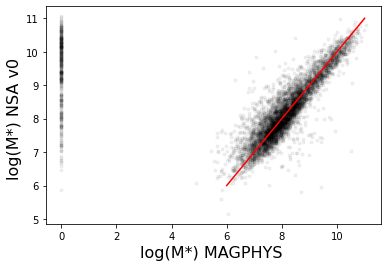

In [24]:
plt.figure()
plt.plot(v.magphys['logMstar'],np.log10(v.nsav0['MASS']),'k.',alpha=.05)
xline = np.linspace(6,11,100)
plt.plot(xline,xline,'r-')
plt.xlabel('log(M*) MAGPHYS ',fontsize=16)
plt.ylabel('log(M*) NSA v0 ',fontsize=16)

(5.0, 12.0, 5.0, 12.0)

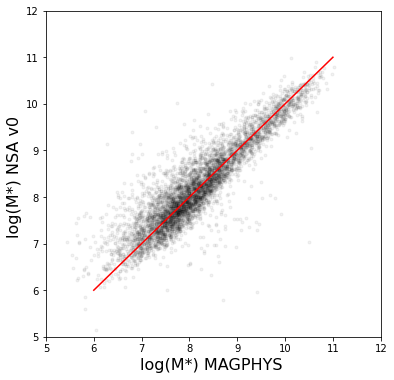

In [27]:
plt.figure(figsize=(6,6))
plt.plot(v.magphys['logMstar'],np.log10(v.nsav0['MASS']),'k.',alpha=.05)
xline = np.linspace(6,11,100)
plt.plot(xline,xline,'r-')
plt.xlabel('log(M*) MAGPHYS ',fontsize=16)
plt.ylabel('log(M*) NSA v0 ',fontsize=16)
plt.axis([5,12,5,12])

(5.0, 12.0, 5.0, 12.0)

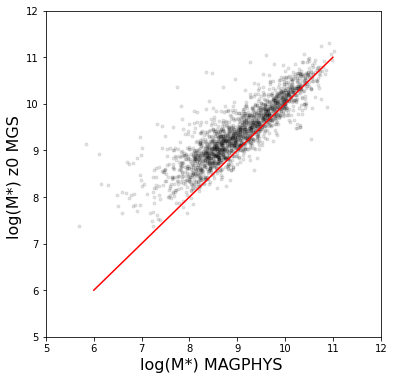

In [35]:
plt.figure(figsize=(6,6))
plt.plot(v.magphys['logMstar'],v.z0mgs['logmass'],'k.',alpha=.1)
xline = np.linspace(6,11,100)
plt.plot(xline,xline,'r-')
plt.xlabel('log(M*) MAGPHYS ',fontsize=16)
plt.ylabel('log(M*) z0 MGS ',fontsize=16)
plt.axis([5,12,5,12])

In [16]:
v.magphys['logMstar'][v.magphys['logMstar']<0]

-3.4375881670502726
-4.081445469449727
-2.64762450499948
-5.050463626623857
-4.909389292171594
-5.17940450345551
-4.361111575294925
-4.619065536669298
-4.349886835556428
-4.0284922182887435
-4.639785386704648
